# Housing 

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
hs= pd.read_csv("Housing.csv")
hs.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [175]:
hs.shape

(545, 13)

In [176]:
hs.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [177]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [178]:
hs.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


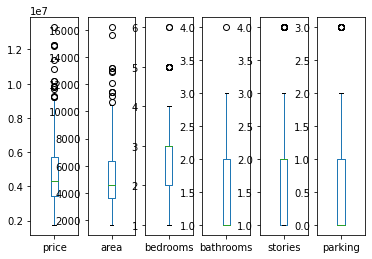

In [179]:
hs.plot(kind="box", subplots=True);

In [180]:
Q1,Q3=hs["price"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["price"]=np.where(hs["price"]>UL, UL, hs["price"])

In [181]:
Q1,Q3=hs["area"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["area"]=np.where(hs["area"]>UL, UL, hs["area"])

In [182]:
Q1,Q3=hs["bedrooms"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["bedrooms"]=np.where(hs["bedrooms"]>UL, UL, hs["bedrooms"])

In [183]:
Q1,Q3=hs["bathrooms"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["bathrooms"]=np.where(hs["bathrooms"]>UL, UL, hs["bathrooms"])

In [184]:
Q1,Q3=hs["stories"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["stories"]=np.where(hs["stories"]>UL, UL, hs["stories"])

In [185]:
Q1,Q3=hs["parking"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["parking"]=np.where(hs["parking"]>UL, UL, hs["parking"])

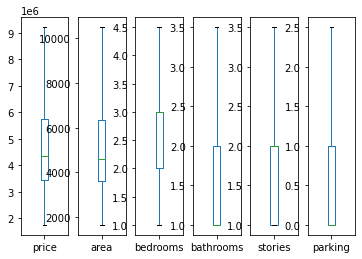

In [186]:
hs.plot(kind="box", subplots=True);

In [187]:
hs.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [188]:
hs.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [189]:
hs.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [190]:
hs.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [191]:
hs.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [192]:
hs.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [193]:
hs.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [194]:
#new_hs = pd.get_dummies(hs, drop_first=True)

In [195]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


In [198]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
hs['mainroad']= label_encoder.fit_transform(hs['mainroad']) 
hs['guestroom']= label_encoder.fit_transform(hs['guestroom']) 
hs['basement']= label_encoder.fit_transform(hs['basement']) 
hs['hotwaterheating']= label_encoder.fit_transform(hs['hotwaterheating']) 
hs['airconditioning']= label_encoder.fit_transform(hs['airconditioning']) 
hs['furnishingstatus']= label_encoder.fit_transform(hs['furnishingstatus']) 
hs['prefarea']= label_encoder.fit_transform(hs['prefarea']) 
hs.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,9205000.0,8960.0,4.0,3.5,3.5,1,0,0,0,1,2.5,0,0
2,9205000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,9205000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.5,1,0
4,9205000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0


In [199]:
X = hs.iloc[:,1:]
y = hs.iloc[:,0]

In [200]:
X.shape, y.shape

((545, 12), (545,))

In [201]:
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2020)

In [202]:
X_train.shape, X_test.shape

((381, 12), (164, 12))

In [203]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.coef_.round(3)

array([ 2.77300000e+02,  9.49282060e+04,  8.84377138e+05,  5.66113536e+05,
        4.37166894e+05,  2.28693197e+05,  4.02442133e+05,  8.02348745e+05,
        6.60637213e+05,  2.67772901e+05,  4.78548108e+05, -9.26537130e+04])

In [204]:
lr.intercept_

-116002.22353748139

In [205]:
p_train=lr.predict(X_train)
p_test=lr.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error, r2_score

In [207]:
RMSE_Train=mean_squared_error(y_train, p_train, squared=False)
RMSE_Test=mean_squared_error(y_test, p_test, squared=False)

In [208]:
RMSE_Train/y_train.mean()

0.20235968995920858

In [209]:
RMSE_Test/y_test.mean()

0.2184641346140464

In [210]:
r2_train=r2_score(y_train, p_train)
r2_test=r2_score(y_test, p_test)

In [211]:
r2_train, r2_test

(0.6919701794903395, 0.6662280800528744)

In [212]:
# Pickling of model
import pickle
pickle.dump(lr, open("Housing_reg_model.pkl", 'wb'))

In [214]:
pickled_model=pickle.load(open("Housing_reg_model.pkl", 'rb'))
pickled_model.predict(hs.drop('price',axis=1))

array([7900272.68146887, 9592276.15972812, 7592725.23621177,
       7892671.7637831 , 6602369.23076991, 7889466.99621601,
       9296721.37138502, 7260047.15714589, 7269481.63003472,
       7400922.39710294, 7611381.25628437, 8026414.71656541,
       6732481.157774  , 5910304.88914165, 6055768.37413734,
       5226618.49789211, 7284827.79657605, 7909337.59943448,
       6207388.82049801, 6601503.89650929, 5468174.31723022,
       6566912.58671156, 5848253.85829053, 6330966.03546179,
       7143357.42419507, 7721270.0989602 , 7697570.44988535,
       4692600.45485531, 7408890.60671657, 6843757.84080948,
       7439797.23295813, 6516356.10477054, 6362043.15504285,
       6757619.13391037, 6221226.18358063, 7493386.95615659,
       7696475.73367942, 8142916.0193744 , 6375095.15994807,
       6950588.11815492, 5980498.75989498, 7258916.98691259,
       7163883.30625046, 6557723.80639158, 7043241.83160649,
       6304830.24346383, 6948313.62609253, 7110524.20493291,
       5184230.08660067,

In [215]:
hs.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')